In [235]:
import numpy as np
# fix seed
np.random.seed(0)

In [236]:
# plot the data points along two principal axes(if pca is applied) or along two feature dimensions(if PCA is not applied)
import matplotlib.pyplot as plt
def plot_data(data, title):
    plt.scatter(data[:, 0], data[:, 1], color="black", s=10)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

### Dataset

In [237]:
INPUT_FILE = "dataset/6D_data_points.txt"
# read file and make N*M numpy matrix
import numpy as np

def read_file(file_name):
    with open(file_name) as f:
        lines = f.readlines()
    lines = [line.strip() for line in lines]
    lines = [line.split(",") for line in lines]
    lines = [[float(x) for x in line] for line in lines]
    return lines

def get_data(file_name):
    lines = read_file(file_name)
    data = np.array(lines)
    return data

data = get_data(INPUT_FILE)
# print first 5 rows
print(data[:5])

[[-8.9838 -8.8101 -8.7325  6.8276  8.0838 -3.6102]
 [-9.078  -8.9883 -9.1242  7.0751  8.1816 -4.0691]
 [ 7.1802 -5.1141 -8.4475 -0.7136  1.3681 -1.5898]
 [10.629  -9.0872  2.9779  6.4922 10.2654  7.7818]
 [-9.0626 -8.9339 -9.0517  6.9821  8.3278 -4.0025]]


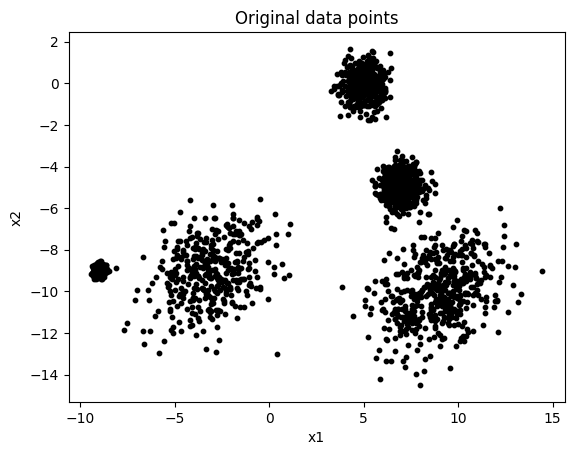

In [238]:
# plot original data
plot_data(data, "Original data points")

### Task 1: Principal Component Analysis

Eigen values:
[103.12439443  93.28884551]
Eigen vectors:
[[-0.60443331 -0.20223632 -0.64413306  0.21411912  0.21758258 -0.29268459]
 [ 0.13545273 -0.25229744  0.14695163  0.31200113  0.80168659  0.3954209 ]]
Transformed data:
[[14.67080106  4.82568751]
 [15.22467112  4.77449289]
 [ 0.3024233  -0.81330591]
 [-7.60224493 15.4220179 ]
 [15.15006625  4.88803338]]


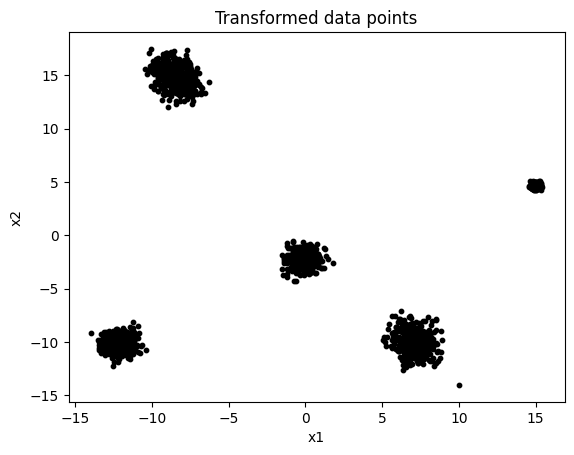

In [239]:
# pca using sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_copy = data.copy()

# fit data
pca.fit(data_copy)

# print eigen values
print("Eigen values:")
print(pca.explained_variance_)
# print eigen vectors
print("Eigen vectors:")
print(pca.components_)
# print transformed data
data_copy = data.copy()
data_transformed = pca.transform(data_copy)

# print first 5 rows
print("Transformed data:")
print(data_transformed[:5])

# plot transformed data
plot_data(data_transformed, "Transformed data points")

Eigen values:
[103.07758354  93.24649923]
Eigen vectors:
[[-0.60443331 -0.20223632]
 [ 0.13545273 -0.25229744]
 [ 0.51874862  0.19106446]
 [ 0.51343851 -0.55296661]
 [-0.17611069 -0.73060078]
 [-0.2293005   0.13925252]]
Transformed data:
[[14.67080106  4.82568751]
 [15.22467112  4.77449289]
 [ 0.3024233  -0.81330591]
 [-7.60224493 15.4220179 ]
 [15.15006625  4.88803338]]


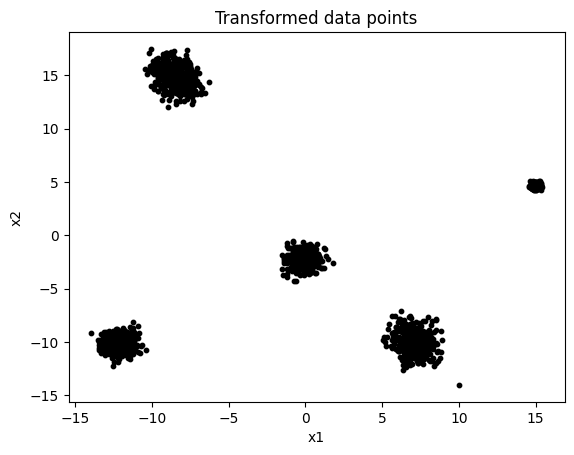

In [240]:
# pca using np svd
# sklearn uses svd to calculate 
# https://gregorygundersen.com/blog/2018/12/10/svd/
# https://www.educative.io/blog/sign-ambiguity-in-singular-value-decomposition
def svd_flip(u, v):
    max_abs_cols = np.argmax(np.abs(u), axis=0)
    signs = np.sign(u[max_abs_cols, range(u.shape[1])])
    u *= signs
    v *= signs[:, np.newaxis]
    return u, v

def pca_svd(data, n_dims=6):
    # subtract mean i.e mean centering
    centered_data = data - np.mean(data, axis=0)
    # calculate covariance matrix with svd
    U , S, eig_vec_T = np.linalg.svd(centered_data, full_matrices=False) #  returns U, S , V.T (V.T is eigen vectors)

    # singular values from the SVD are the square roots of the eigenvalues from the covariance matrix of the data
    eig_val = S ** 2 / centered_data.shape[0]
    
    # flip eigen vector's sign to enforce deterministic output
    U, eig_vec_T = svd_flip(U, eig_vec_T)
    
    # project data on eigen vectors
    transformed_data = np.dot(centered_data, eig_vec_T.T)
    # select first n_dims columns
    return transformed_data[:, :n_dims], eig_val[:n_dims], eig_vec_T[:, :n_dims]

data_copy = data.copy()
if data.shape[1] > 2:
    data_copy, eig_val, eig_vec = pca_svd(data_copy, n_dims=2)
    print("Eigen values:")
    print(eig_val)
    print("Eigen vectors:")
    print(eig_vec)
    print("Transformed data:")
    print(data_copy[:5])
    # plot transformed data
    plot_data(data_copy, "Transformed data points")

g:\Level-4-term-2\CSE472-ML-lab\CSE472-ML-sessional\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


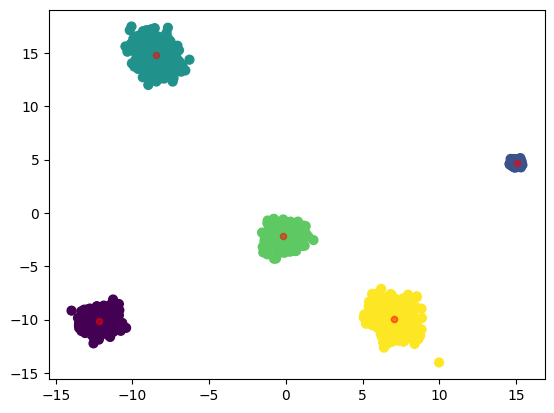

In [241]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(5, random_state=0)
X = data_copy.copy()
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
# plot centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=20, alpha=0.5)
plt.show()

#### Task 2: GMM Estimation with Expectation-Maximization Algorithm

##### 📖Must read
- https://scikit-learn.org/stable/modules/mixture.html
- [Implementing the EM for the Gaussian Mixture in Python | NumPy & TensorFlow Probability](https://www.youtube.com/watch?v=vl_5evp-CYo)
- https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

# masum

In [262]:
# import scipy multivariate normal distribution
from scipy.stats import multivariate_normal

class GaussianMixtureModel:
  def __init__(self, n_components: int):
    self.n_components: int = n_components
    self.n_features: int = 2
    self.means: np.ndarray = None # mu shape = (n_components, n_features)
    self.covariances: np.ndarray = None  # sigma shape = (n_components, n_features, n_features)
    self.weights: np.ndarray = None
    self.log_likelihood: np.ndarray = None
    print(f"GaussianMixtureModel for {self.n_components} components...")

  def _init_params(self, X: np.ndarray) -> None:

    # initialize number of features
    self.n_features = X.shape[1]

    # initialize means
    self.means = np.random.rand(self.n_components, self.n_features)

    # initialize covariances
    # shape = (n_components, n_features, n_features)
    self.covariances = np.array([np.eye(self.n_features)] * self.n_components)

    # initialize weights
    self.weights = np.ones(self.n_components) / self.n_components

    # initialize log likelihood
    self.log_likelihood = []


  def fit(self, X, n_itr = 1000, tol=1e-4, plot=False, contour=False):

    # initialize parameters
    self._init_params(X)

    if plot: plt.ion()

    for itr in range(n_itr):
      # E step
      # calculate probabilities of each data point belonging to each component
      component_prob_mat = self._e_step(X)
      # M step
      # update parameters
      self._m_step(X, component_prob_mat)

      # calculate log likelihood
      log_likelihood = self._log_likelihood(X)
      self.log_likelihood.append(log_likelihood)

      # check for convergence
      if len(self.log_likelihood) > 2 and np.abs(self.log_likelihood[-1] - self.log_likelihood[-2]) < tol:
        print(f"Converged after {itr} iterations")
        break

      # plot
      if plot and self.n_features >= 2:
        plt.clf()
        plt.title(f"Iteration {itr}")
        plt.scatter(X[:, 0], X[:, 1], c=component_prob_mat, s=10, cmap='viridis')
        if contour:
          self._plot_contour(X)
        plt.pause(0.01)

    if plot: plt.ioff()

    print(f"Converged after {itr:3d}/{n_itr} iterations, likelihood={self.log_likelihood[-1]:.4f}")

  def _e_step(self, X: np.ndarray) -> np.ndarray:
    # describe the probability that a given data point belongs to a particular Gaussian component in the mixture model.
    # a measure of how much a particular component is "responsible" for a given data point.
    component_prob_mat = np.zeros((X.shape[0], self.n_components), dtype=float) # shape = (n_samples, n_components)
    
    for i in range(self.n_components):
      normal_dist = multivariate_normal.pdf(
        X, 
        mean=self.means[i], 
        cov=self.covariances[i], 
        allow_singular=True) # shape = (n_samples, )
      # p_ij = P(C = i) * P(x_j | C = i, mu_i, sigma_i)
      component_prob_mat[:, i] = self.weights[i] * normal_dist

    # calculate mixture likelihood
  
    # P(x) = sum_i_1_to_k[ P(C = i) * P(x | C = i) ]
    #      = sum_i_1_to_k[ w_i * N(x | mu_i, sigma_i) ]
    self.mixture_likelihood:np.ndarray = component_prob_mat.sum(axis=1, keepdims=True) # shape = (n_samples, 1)

    # normalize responsibility to make sure that each row of responsibility matrix sums to 1
    # each cell represents the probability that a given data point belongs 
    # to a particular Gaussian component in the mixture model.
    component_prob_mat /= component_prob_mat.sum(axis=1, keepdims=True)

    return component_prob_mat
  
  def _m_step(self, X: np.ndarray, component_prob_mat: np.ndarray) -> None:
    
    for component_i in range(self.n_components):
      # get probability of each data point belonging to ith component
      component_i_probs:np.ndarray = component_prob_mat[:, component_i].reshape(-1, 1) # shape = (n_samples, 1). 
      # sum of all probabilities of data points belonging to ith component
      # n_i
      total_prob = component_i_probs.sum()
  
      # update mean
      # mu_i = sum_j(p_ji * x_j) / n_i
      self.means[component_i] = np.sum(component_i_probs * X, axis=0) / total_prob

      # update covariance
      deviation:np.ndarray = X - self.means[component_i] # shape = (n_samples, n_features)
      self.covariances[component_i] = np.dot(deviation.T, component_i_probs * deviation) / total_prob

      # update weights
      # w_i = n_i / N
      self.weights[component_i] = total_prob / X.shape[0]
  
  def _log_likelihood(self, X):
    return np.sum(np.log(self.mixture_likelihood))
  
  def _plot_contour(self, X):
    # plot contour
    x = np.linspace(X[:, 0].min(), X[:, 0].max())
    y = np.linspace(X[:, 1].min(), X[:, 1].max())
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = self.predict(XX)
    Z = Z.reshape(X.shape)
    plt.contour(X, Y, Z)

  def predict(self, X):
    # calculate probabilities of each data point belonging to each component
    component_prob_mat = self._e_step(X)
    # return index of component with max probability
    return np.argmax(component_prob_mat, axis=1)
  

# fit GMM
X = data_copy.copy()
gmm = GaussianMixtureModel(n_components=4)
gmm.fit(X, plot=True)

# plot log likelihood
plt.figure()
plt.plot(gmm.log_likelihood)
plt.title("Log likelihood")
plt.xlabel("Iteration")
plt.ylabel("Log likelihood")
plt.show()

: 